In [204]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [205]:
activity_mapping = {'LAYING': 0,
 'SITTING': 1,
 'STANDING': 2,
 'WALKING': 3,
 'WALKING_DOWNSTAIRS': 4,
 'WALKING_UPSTAIRS': 5}

In [206]:
train_dataset = pd.read_csv("train.csv")
train_dataset["Output"] = [activity_mapping[item] for item in train_dataset.Activity]
train_dataset = train_dataset.sample(frac=1)
train_dataset.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Output
529,0.273254,-0.026321,-0.129500,-0.997514,-0.978270,-0.989602,-0.998221,-0.975785,-0.990276,-0.941013,...,-0.033249,-0.089349,0.459226,0.040911,-0.744320,0.273851,0.036708,3,STANDING,2
5402,0.242280,-0.010742,-0.084190,-0.570424,-0.145200,-0.468300,-0.600792,-0.158633,-0.457094,-0.425993,...,0.454283,0.295653,0.914943,-0.421896,-0.856689,0.191232,-0.017644,25,WALKING,3
5724,0.383626,-0.121073,-0.216725,-0.874451,-0.374021,-0.827744,-0.886202,-0.375775,-0.801668,-0.730040,...,-0.017454,0.097705,0.507430,-0.195647,-0.694706,-0.029433,-0.158654,26,SITTING,1
3778,0.321760,-0.018087,-0.198355,-0.107749,-0.036016,-0.457607,-0.163466,-0.023487,-0.486706,-0.073913,...,-0.240728,-0.147026,0.949431,-0.268552,-0.603945,0.360847,0.093697,19,WALKING_UPSTAIRS,5
5849,0.236456,-0.021251,-0.115131,-0.185527,-0.192308,-0.393220,-0.276564,-0.221681,-0.411878,0.126750,...,0.656806,-0.983148,0.994366,-0.503227,-0.760620,0.262442,0.037581,26,WALKING_UPSTAIRS,5


In [207]:
X_train = train_dataset.drop(["subject", "Activity", "Output"], axis = 1)
y_train = train_dataset["Output"]
set(y_train)

{0, 1, 2, 3, 4, 5}

In [208]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
529,0.273254,-0.026321,-0.129500,-0.997514,-0.978270,-0.989602,-0.998221,-0.975785,-0.990276,-0.941013,...,0.344466,-0.537599,-0.755762,-0.033249,-0.089349,0.459226,0.040911,-0.744320,0.273851,0.036708
5402,0.242280,-0.010742,-0.084190,-0.570424,-0.145200,-0.468300,-0.600792,-0.158633,-0.457094,-0.425993,...,0.015156,-0.273386,-0.583241,0.454283,0.295653,0.914943,-0.421896,-0.856689,0.191232,-0.017644
5724,0.383626,-0.121073,-0.216725,-0.874451,-0.374021,-0.827744,-0.886202,-0.375775,-0.801668,-0.730040,...,-0.080248,-0.276929,-0.656969,-0.017454,0.097705,0.507430,-0.195647,-0.694706,-0.029433,-0.158654
3778,0.321760,-0.018087,-0.198355,-0.107749,-0.036016,-0.457607,-0.163466,-0.023487,-0.486706,-0.073913,...,0.329408,0.178440,-0.053290,-0.240728,-0.147026,0.949431,-0.268552,-0.603945,0.360847,0.093697
5849,0.236456,-0.021251,-0.115131,-0.185527,-0.192308,-0.393220,-0.276564,-0.221681,-0.411878,0.126750,...,-0.194992,-0.066971,-0.527676,0.656806,-0.983148,0.994366,-0.503227,-0.760620,0.262442,0.037581


In [209]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train[:5], y_train[:5]

(array([[ 0.27325437, -0.02632061, -0.12949951, ..., -0.74432014,
          0.27385105,  0.03670786],
        [ 0.2422799 , -0.01074209, -0.08419014, ..., -0.85668859,
          0.19123228, -0.01764408],
        [ 0.38362647, -0.12107333, -0.21672453, ..., -0.69470566,
         -0.02943284, -0.15865355],
        [ 0.32176046, -0.01808673, -0.19835518, ..., -0.60394536,
          0.36084659,  0.09369691],
        [ 0.23645585, -0.02125119, -0.11513135, ..., -0.76062   ,
          0.26244173,  0.03758095]]),
 array([2, 3, 1, 5, 5]))

In [210]:
test_dataset = pd.read_csv("test.csv")
test_dataset["Output"] = [activity_mapping[item] for item in test_dataset.Activity]
test_dataset = test_dataset.sample(frac=1)
test_dataset.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Output
1464,0.339960,-0.048642,-0.135529,-0.076412,0.067242,-0.465712,-0.151272,0.031526,-0.493239,0.444512,...,-0.469575,0.826685,0.936665,-0.347525,-0.850703,0.199345,0.039075,12,WALKING,3
1158,0.253750,-0.035701,-0.117255,0.357070,-0.134672,-0.318330,0.277229,-0.208554,-0.354539,0.532936,...,0.337477,-0.819488,0.926197,-0.383461,-0.893872,0.067249,-0.054342,10,WALKING_DOWNSTAIRS,4
2892,0.308645,-0.048537,-0.126176,-0.102589,-0.084722,-0.256660,-0.155501,-0.149944,-0.270094,0.136299,...,-0.308785,-0.398142,0.963362,0.211219,-0.844386,0.173661,0.097974,24,WALKING_DOWNSTAIRS,4
529,0.257800,-0.016095,-0.106748,-0.987424,-0.980003,-0.987590,-0.987443,-0.980904,-0.988268,-0.937776,...,-0.051061,0.248941,0.532633,-0.687609,0.529496,-0.882329,-0.101303,4,LAYING,0
2728,0.341223,-0.037941,-0.101051,-0.362806,-0.102432,-0.298399,-0.406056,-0.141608,-0.321309,-0.202928,...,-0.616749,0.937227,-0.919333,0.750880,-0.678012,0.246968,0.187819,24,WALKING_UPSTAIRS,5


In [211]:
X_test = test_dataset.drop(["subject", "Activity", "Output"], axis = 1)
y_test = test_dataset["Output"]

In [212]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
1464,0.339960,-0.048642,-0.135529,-0.076412,0.067242,-0.465712,-0.151272,0.031526,-0.493239,0.444512,...,0.241415,-0.214262,-0.614412,-0.469575,0.826685,0.936665,-0.347525,-0.850703,0.199345,0.039075
1158,0.253750,-0.035701,-0.117255,0.357070,-0.134672,-0.318330,0.277229,-0.208554,-0.354539,0.532936,...,0.331741,-0.524084,-0.817926,0.337477,-0.819488,0.926197,-0.383461,-0.893872,0.067249,-0.054342
2892,0.308645,-0.048537,-0.126176,-0.102589,-0.084722,-0.256660,-0.155501,-0.149944,-0.270094,0.136299,...,0.057747,0.016081,-0.336833,-0.308785,-0.398142,0.963362,0.211219,-0.844386,0.173661,0.097974
529,0.257800,-0.016095,-0.106748,-0.987424,-0.980003,-0.987590,-0.987443,-0.980904,-0.988268,-0.937776,...,0.313792,-0.398364,-0.669616,-0.051061,0.248941,0.532633,-0.687609,0.529496,-0.882329,-0.101303
2728,0.341223,-0.037941,-0.101051,-0.362806,-0.102432,-0.298399,-0.406056,-0.141608,-0.321309,-0.202928,...,-0.074322,-0.326320,-0.733661,-0.616749,0.937227,-0.919333,0.750880,-0.678012,0.246968,0.187819


In [213]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test[:5], y_test[:5]

(array([[ 0.33996029, -0.04864207, -0.13552937, ..., -0.85070327,
          0.19934469,  0.03907509],
        [ 0.25375015, -0.035701  , -0.11725527, ..., -0.89387217,
          0.06724895, -0.05434247],
        [ 0.30864492, -0.04853694, -0.12617575, ..., -0.84438644,
          0.17366115,  0.0979739 ],
        [ 0.25779981, -0.01609521, -0.10674798, ...,  0.5294955 ,
         -0.88232945, -0.10130278],
        [ 0.34122299, -0.03794084, -0.10105122, ..., -0.67801155,
          0.24696787,  0.18781937]]),
 array([3, 4, 4, 0, 5]))

In [214]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [221]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(561,), activation='relu'),
    keras.layers.Dense(6, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [222]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
230/230 [==============================] - 1s 2ms/step - loss: 0.4472 - accuracy: 0.8356
Epoch 2/100
230/230 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9421
Epoch 3/100
230/230 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.9539
Epoch 4/100
230/230 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9657
Epoch 5/100
230/230 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9672
Epoch 6/100
230/230 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9717
Epoch 7/100
230/230 [==============================] - 1s 2ms/step - loss: 0.0697 - accuracy: 0.9744
Epoch 8/100
230/230 [==============================] - 1s 2ms/step - loss: 0.0624 - accuracy: 0.9770
Epoch 9/100
230/230 [==============================] - 1s 2ms/step - loss: 0.0625 - accuracy: 0.9763
Epoch 10/100
230/230 [==============================] - 1s 2ms/step - loss: 0.0609 - accura

In [223]:
model.evaluate(X_test,y_test)

93/93 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.9423


[0.30762165784835815, 0.9423142075538635]

In [224]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(68.09375, 0.5, 'Truth')

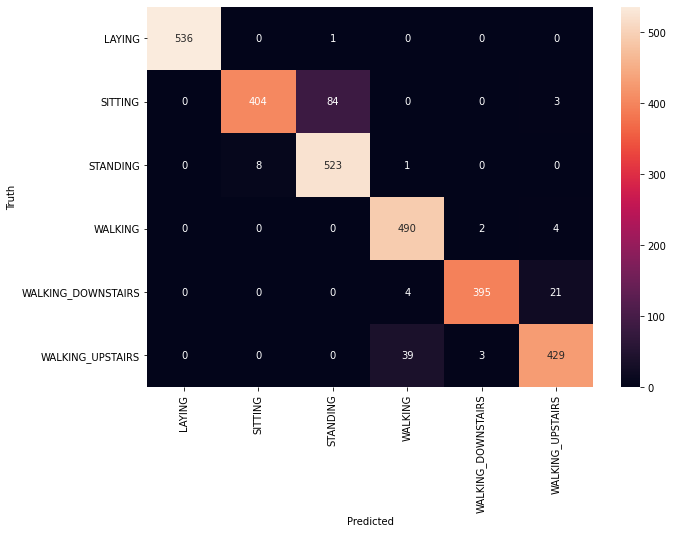

In [225]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',xticklabels = activity_mapping.keys(), yticklabels = activity_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Truth')